In [577]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [578]:
train_data = pd.read_csv("train_data.csv")


In [579]:
pd.set_option('display.max_columns',None)

In [580]:
train_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

# Feature Enginnering


In [581]:
## Handling categorical variables

In [582]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [583]:
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        train_data[i] = encoder.fit_transform(train_data[i])

In [584]:
train_data.drop('Unnamed: 0', axis =1, inplace = True)

In [585]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,dep_min,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,3,0,5,18,4,8,3897,24,3,22,20,1,10,2,50
1,1,3,0,84,1,8,7662,1,5,5,50,13,15,7,25
2,4,2,1,118,1,8,13882,9,6,9,25,4,25,19,0
3,3,3,0,91,0,8,6218,12,5,18,5,23,30,5,25
4,3,0,5,29,0,8,13302,1,3,16,50,21,35,4,45


In [586]:
x = train_data.drop(columns=['Price'])
y = train_data.Price

## Handling Outliers

In [587]:
## The target variable price is not normally distributed and found there are few outliers were there.
## here Quantile based flooring and capping is using to handle outliers
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(train_data['Price'], 10)
ninetieth_percentile = np.percentile(train_data['Price'], 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
train_data['Price'] = np.where(train_data['Price']>ninetieth_percentile, ninetieth_percentile, train_data['Price'])

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

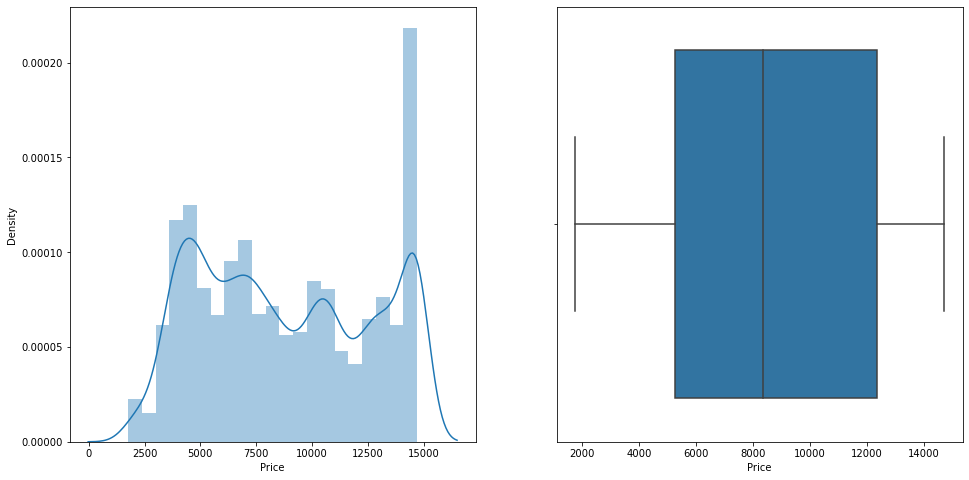

In [588]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.distplot(train_data['Price'])
plt.subplot(1,2,2)
sns.boxplot(train_data['Price'])

In [589]:
import scipy.stats as stats
alpha = 0.05
a,b= stats.jarque_bera(train_data['Price'])
print ("Statistics", a, "p-value", b)
if b < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")## Normality check for price

Statistics 772.1280788084949 p-value 0.0
The null hypothesis can be rejected


Even after removing outliers , the price data is not normally distributed.
here Box-Cox transformation can be used to transform the target variable into normal.

### Boxcox transformation


/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


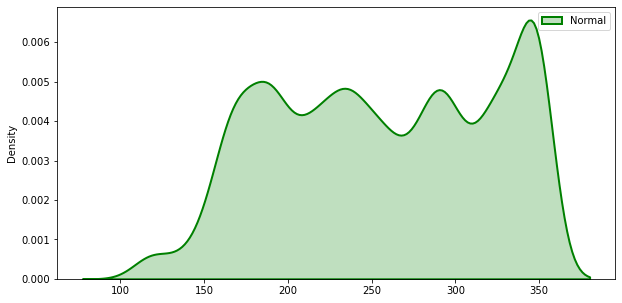

In [590]:
# Target variable
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(train_data['Price'])
  
# fitted data (normal)

fig = plt.figure(figsize=(10,5))
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

We will not eliminate data with a large number of hours because the above graphs displayed for EDA reveal a price pattern as the number of hours increases.


In [591]:
## Normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(x)

In [592]:
scaled_data= pd.DataFrame(data=scaled_data, columns=x.columns)
scaled_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,dep_min,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,0.272727,0.00,1.0,0.141732,1.00,0.888889,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.090909,0.75,0.0,0.661417,0.25,0.888889,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545
2,0.363636,0.50,0.2,0.929134,0.25,0.888889,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000
3,0.272727,0.75,0.0,0.716535,0.00,0.888889,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545
4,0.272727,0.00,1.0,0.228346,0.00,0.888889,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182


In [593]:
scaled_data.shape

(10682, 14)

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_hours', ylabel='Density'>

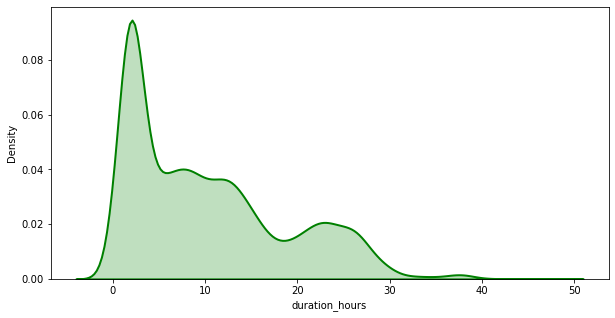

In [594]:
plt.figure(figsize=(10,5))
sns.distplot(train_data['duration_hours'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

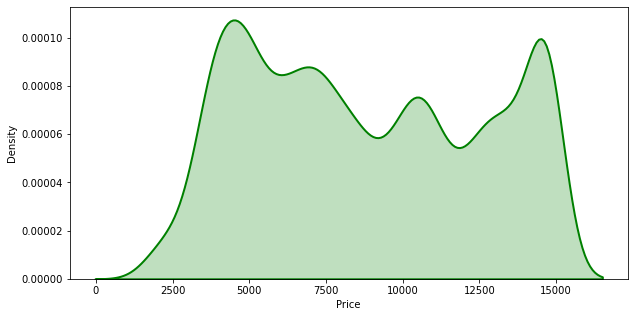

In [595]:
plt.figure(figsize=(10,5))
sns.distplot(train_data['Price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

## Feature selection 


since our independent variables and target variables all are numeric variables , 
1. correlation (heatmap)
2. Feature importance 
will be use for feature selection


#### Feature selection 
used extra tree regressorb for feature selection

In [596]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [597]:
print(selection.feature_importances_)

[0.12906348 0.01190872 0.02279401 0.05900027 0.36844455 0.05537808
 0.1318974  0.04537178 0.02160437 0.01890588 0.02569905 0.01656066
 0.07798533 0.01538641]


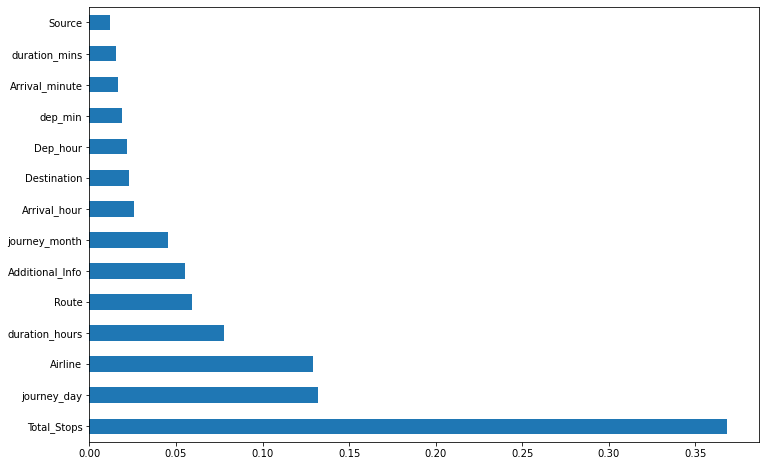

In [598]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [600]:
scaled_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,dep_min,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,0.272727,0.00,1.0,0.141732,1.00,0.888889,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.090909,0.75,0.0,0.661417,0.25,0.888889,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545
2,0.363636,0.50,0.2,0.929134,0.25,0.888889,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000
3,0.272727,0.75,0.0,0.716535,0.00,0.888889,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545
4,0.272727,0.00,1.0,0.228346,0.00,0.888889,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182


In [608]:
scaled_data.to_csv('x.csv')

In [609]:
y.to_csv('y.csv')